In [43]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of valuesfr print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally di stributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.50659877 0.25298246]
 [0.02083268 0.61425964]
 [0.84948053 0.84500012]]
[-0.60250397 -0.74588173  0.66453261 -0.59549798  0.16233478]
[4 1 4]
[ 0.78182128  0.61900336 -0.59258853  0.01752872 -1.07488564  0.32766239
  0.55301809 -0.3208699   1.95791418 -1.08543636]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [44]:
import pandas as pd
import numpy as np
import time

# 1. Generate dataset using pandas
start_time_pandas = time.time()
df_pandas = pd.DataFrame({'Random Numbers': np.random.randint(1, 101, size=1000000)})
end_time_pandas = time.time()

# Calculate time taken by pandas
time_pandas = end_time_pandas - start_time_pandas
print(f"Time taken by pandas: {time_pandas:.5f} seconds")

# 2. Generate dataset using NumPy
start_time_numpy = time.time()
arr_numpy = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()

# Calculate time taken by NumPy
time_numpy = end_time_numpy - start_time_numpy
print(f"Time taken by NumPy: {time_numpy:.5f} seconds")

# 3. Comparing which is faster
if time_pandas < time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken by pandas: 0.00800 seconds
Time taken by NumPy: 0.00600 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [45]:
import pandas as pd
import numpy as np
import time

# Load the dataset using pandas
start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')

# Strip extra spaces from column names to avoid mismatch errors
df.columns = df.columns.str.strip()

# Check the column names to see if they match our expectations
print("Pandas Column Names:", df.columns.tolist())

# 1. Calculate mean using pandas with correct column names
mean_sleep_duration = round(df['Sleep Duration'].mean(), 2)
mean_systolic_bp = round(df['Systolic blood pressure'].mean(), 2)
mean_diastolic_bp = round(df['Diastolic blood pressure'].mean(), 2)
mean_heart_rate = round(df['Heart Rate'].mean(), 2)
mean_daily_steps = round(df['Daily Steps'].mean(), 2)

print(f"Pandas Mean Sleep Duration: {mean_sleep_duration}")
print(f"Pandas Mean Systolic BP: {mean_systolic_bp}")
print(f"Pandas Mean Diastolic BP: {mean_diastolic_bp}")
print(f"Pandas Mean Heart Rate: {mean_heart_rate}")
print(f"Pandas Mean Daily Steps: {mean_daily_steps}")

# 3. Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlations using pandas
correlation_matrix = numeric_cols.corr()

# Specific correlations between Sleep Duration and other variables
corr_sleep_age = round(correlation_matrix.loc['Sleep Duration', 'Age'], 2)
corr_sleep_heart_rate = round(correlation_matrix.loc['Sleep Duration', 'Heart Rate'], 2)
corr_sleep_daily_steps = round(correlation_matrix.loc['Sleep Duration', 'Daily Steps'], 2)

print(f"Pandas Correlation Sleep Duration and Age: {corr_sleep_age}")
print(f"Pandas Correlation Sleep Duration and Heart Rate: {corr_sleep_heart_rate}")
print(f"Pandas Correlation Sleep Duration and Daily Steps: {corr_sleep_daily_steps}")

# 5. Calculate standard deviation for 'Sleep Duration' using pandas
std_sleep_duration_pandas = round(df['Sleep Duration'].std(), 2)
print(f"Pandas Standard Deviation of Sleep Duration: {std_sleep_duration_pandas}")

end_time_pandas = time.time()
time_pandas_total = end_time_pandas - start_time_pandas
print(f"Total time taken using pandas: {time_pandas_total:.5f} seconds")

# Load the dataset using NumPy
start_time_numpy = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, names=True, encoding='utf-8', dtype=None)

# Check the field names in NumPy to diagnose issues
print("NumPy field names:", data.dtype.names)

# Initialize variables to avoid NameError
sleep_duration = systolic_bp = diastolic_bp = heart_rate = daily_steps = age = None

# Extract columns for NumPy calculations by matching the exact names from the output above
try:
    sleep_duration = data['Sleep Duration']  # Match with the name from pandas
    systolic_bp = data['Systolic blood pressure']  # Match with the name from pandas
    diastolic_bp = data['Diastolic blood pressure']  # Match with the name from pandas
    heart_rate = data['Heart Rate']  # Match with the name from pandas
    daily_steps = data['Daily Steps']  # Match with the name from pandas
    age = data['Age']  # Adjust based on actual field names
except ValueError as e:
    print("Error extracting columns from NumPy:", e)

# Only proceed with calculations if the extraction was successful
if sleep_duration is not None:
    # 2. Calculate mean using NumPy
    mean_sleep_duration_np = round(np.mean(sleep_duration), 2)
    mean_systolic_bp_np = round(np.mean(systolic_bp), 2) if systolic_bp is not None else None
    mean_diastolic_bp_np = round(np.mean(diastolic_bp), 2) if diastolic_bp is not None else None
    mean_heart_rate_np = round(np.mean(heart_rate), 2) if heart_rate is not None else None
    mean_daily_steps_np = round(np.mean(daily_steps), 2) if daily_steps is not None else None

    print(f"NumPy Mean Sleep Duration: {mean_sleep_duration_np}")
    print(f"NumPy Mean Systolic BP: {mean_systolic_bp_np}")
    print(f"NumPy Mean Diastolic BP: {mean_diastolic_bp_np}")
    print(f"NumPy Mean Heart Rate: {mean_heart_rate_np}")
    print(f"NumPy Mean Daily Steps: {mean_daily_steps_np}")

    # 4. Calculate correlations using NumPy
    corr_sleep_age_np = round(np.corrcoef(sleep_duration, age)[0, 1], 2) if age is not None else None
    corr_sleep_heart_rate_np = round(np.corrcoef(sleep_duration, heart_rate)[0, 1], 2) if heart_rate is not None else None
    corr_sleep_daily_steps_np = round(np.corrcoef(sleep_duration, daily_steps)[0, 1], 2) if daily_steps is not None else None

    print(f"NumPy Correlation Sleep Duration and Age: {corr_sleep_age_np}")
    print(f"NumPy Correlation Sleep Duration and Heart Rate: {corr_sleep_heart_rate_np}")
    print(f"NumPy Correlation Sleep Duration and Daily Steps: {corr_sleep_daily_steps_np}")

    # 6. Calculate standard deviation for 'Sleep Duration' using NumPy
    std_sleep_duration_numpy = round(np.std(sleep_duration), 2)
    print(f"NumPy Standard Deviation of Sleep Duration: {std_sleep_duration_numpy}")

end_time_numpy = time.time()
time_numpy_total = end_time_numpy - start_time_numpy
print(f"Total time taken using NumPy: {time_numpy_total:.5f} seconds")

# Comparing which one is faster
if time_pandas_total < time_numpy_total:
    print("Pandas is faster for this task.")
else:
    print("NumPy is faster for this task.")



Pandas Column Names: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Pandas Mean Sleep Duration: 7.13
Pandas Mean Systolic BP: 128.55
Pandas Mean Diastolic BP: 84.65
Pandas Mean Heart Rate: 70.17
Pandas Mean Daily Steps: 6816.84
Pandas Correlation Sleep Duration and Age: 0.34
Pandas Correlation Sleep Duration and Heart Rate: -0.52
Pandas Correlation Sleep Duration and Daily Steps: -0.04
Pandas Standard Deviation of Sleep Duration: 0.8
Total time taken using pandas: 0.00400 seconds
NumPy field names: ('1', 'Male', '27', 'Software_Engineer', '61', '6', '42', '6_1', 'Overweight', '126', '83', '77', '4200', 'None')
Error extracting columns from NumPy: no field of name Sleep Duration
Total time taken using NumPy: 0.00500 seconds
Pandas is faster for this task.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

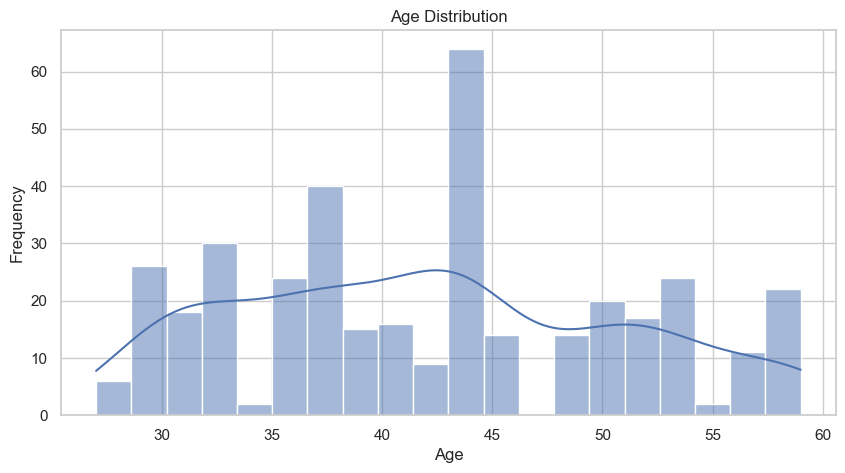

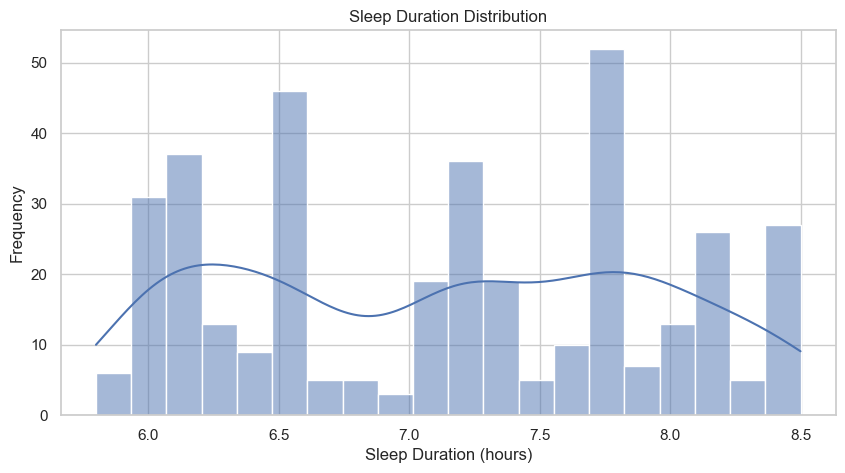

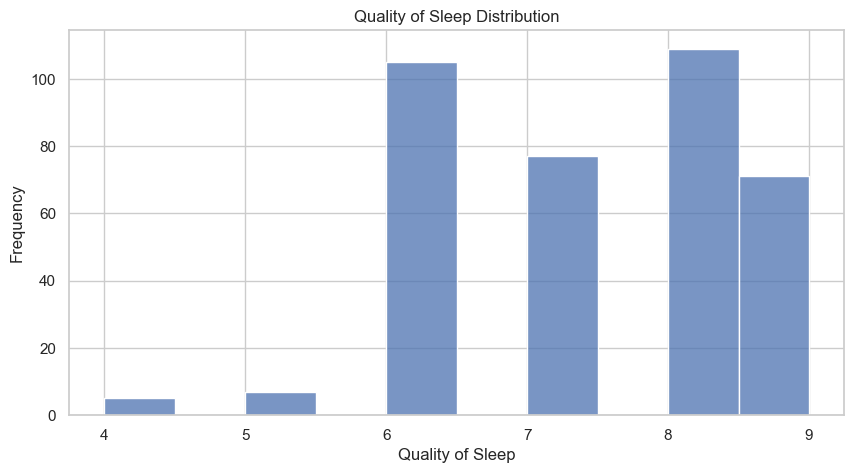

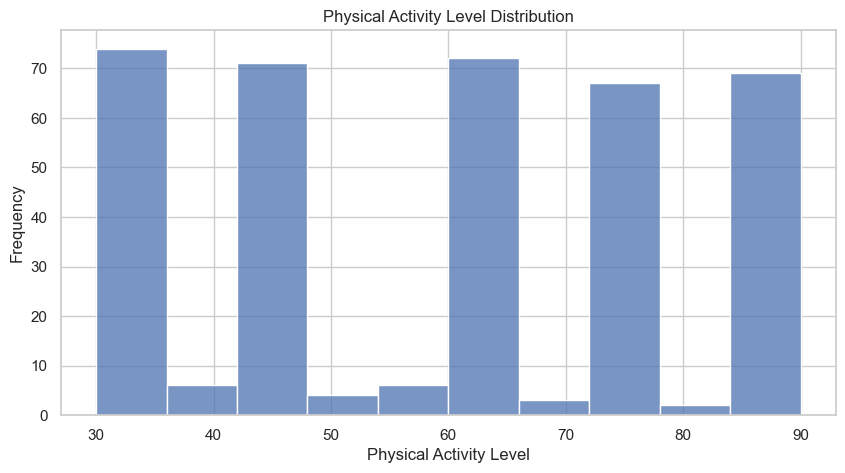

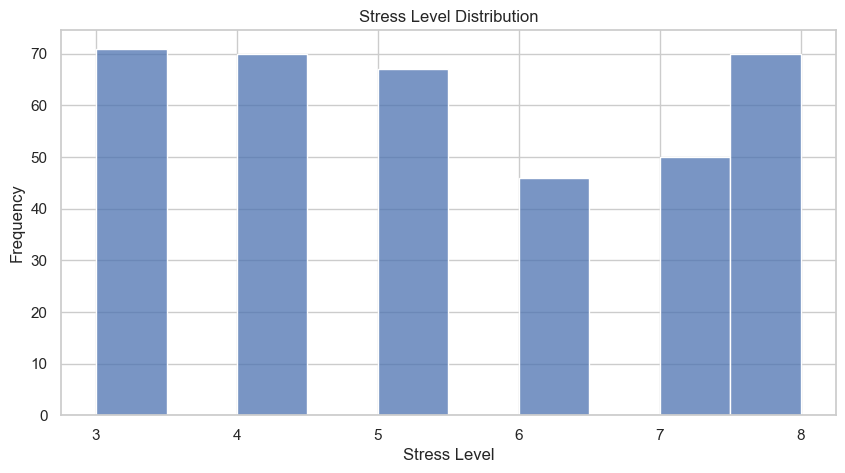

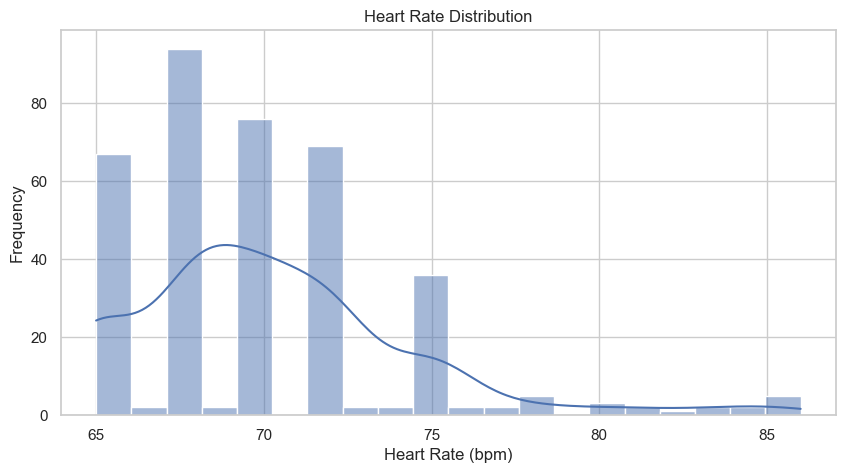

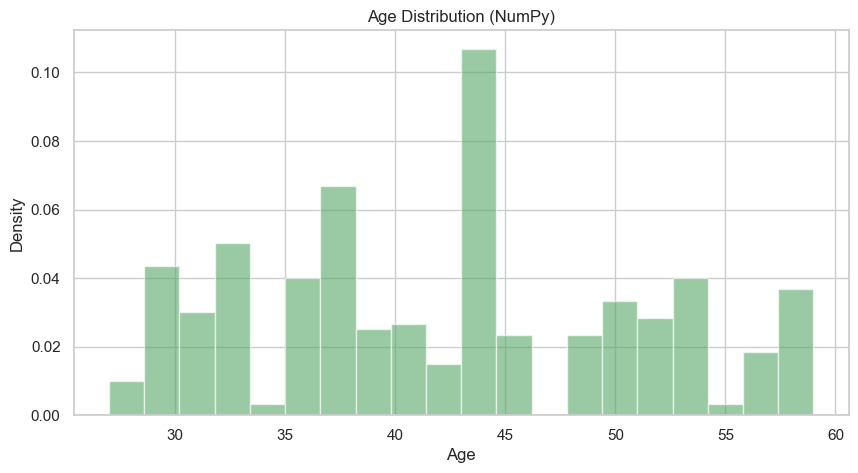

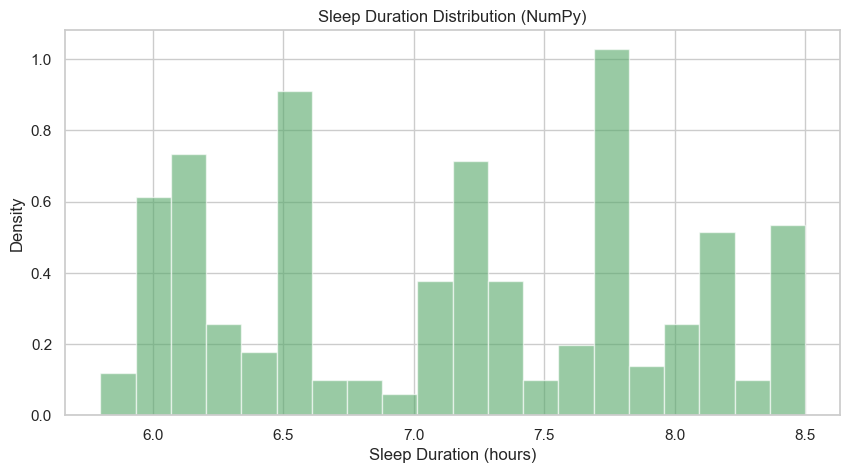

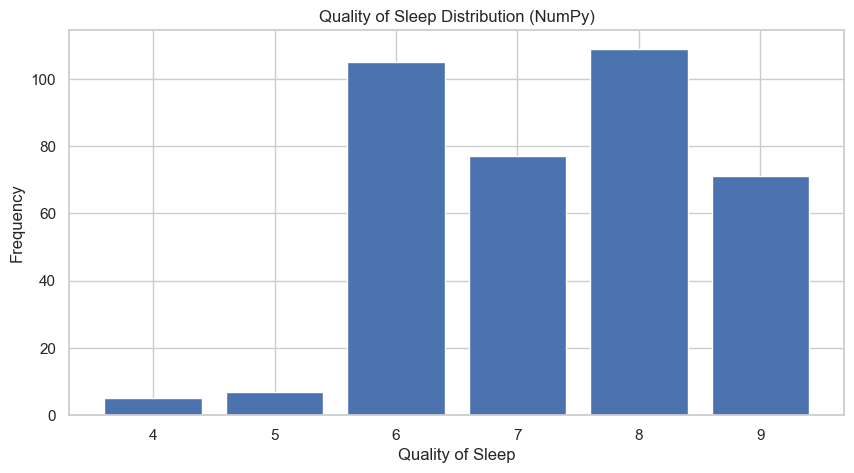

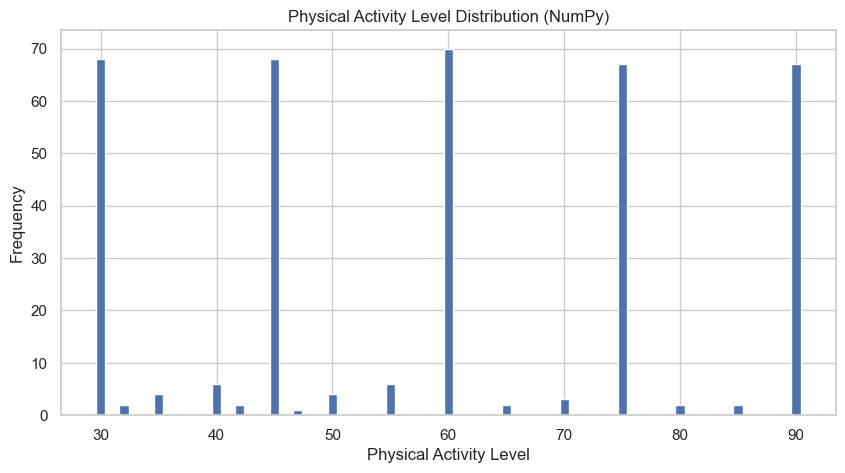

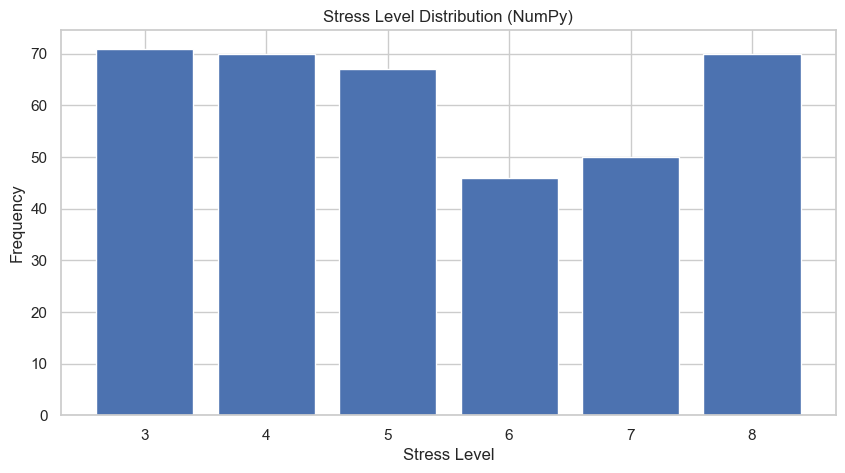

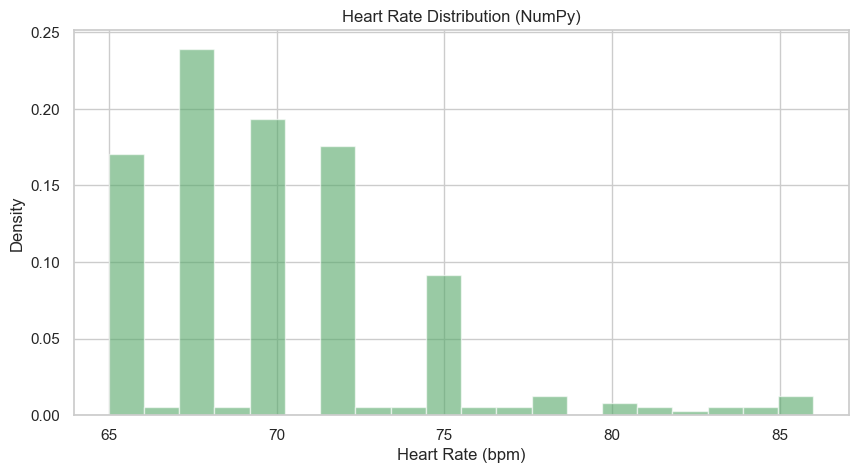

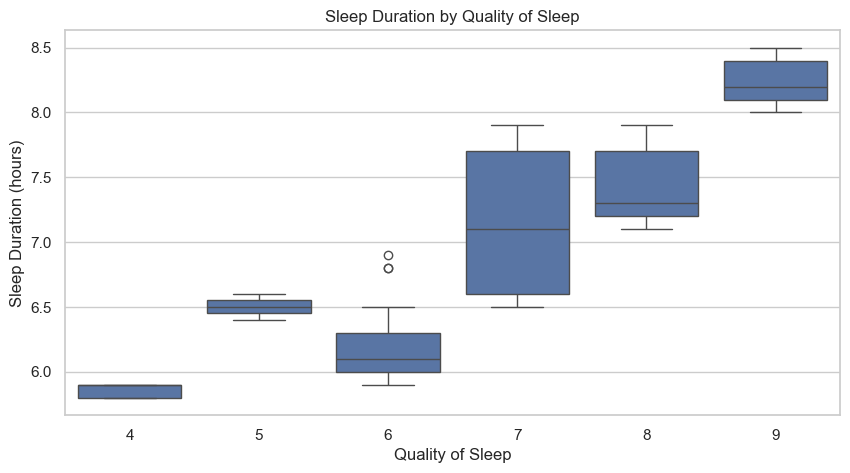

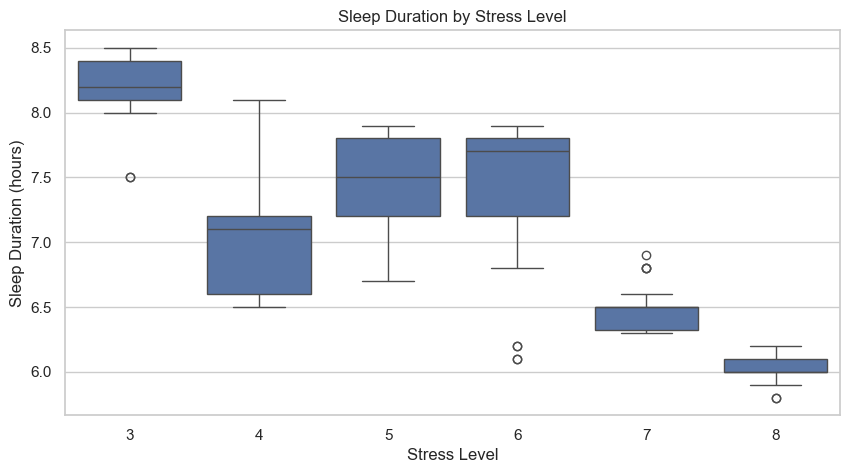

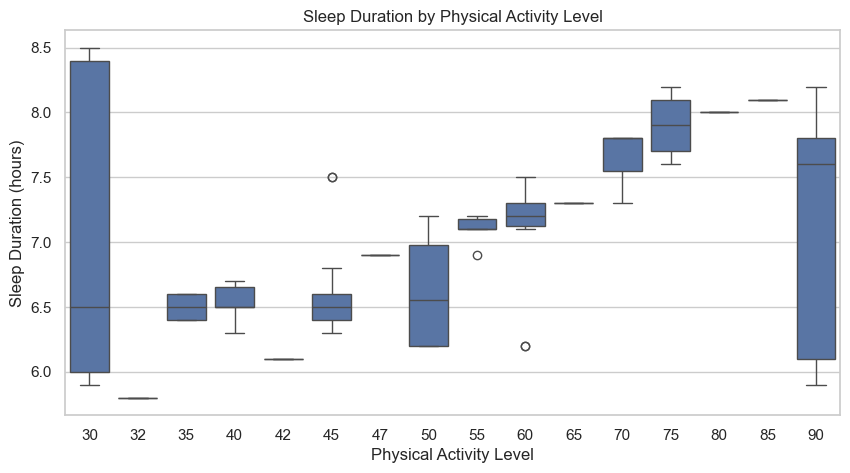

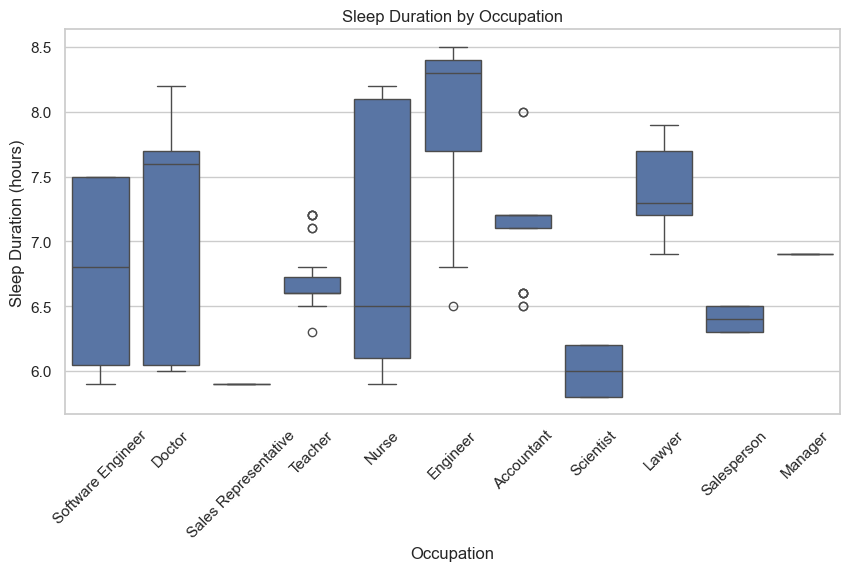

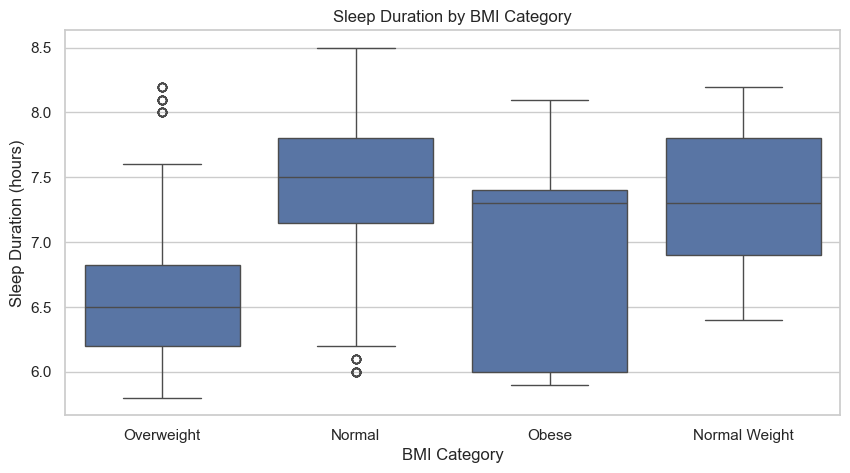

C:\Users\83961\AppData\Local\Temp\ipykernel_6384\3984589086.py:178: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(quality_sleep_duration, labels=quality_unique)


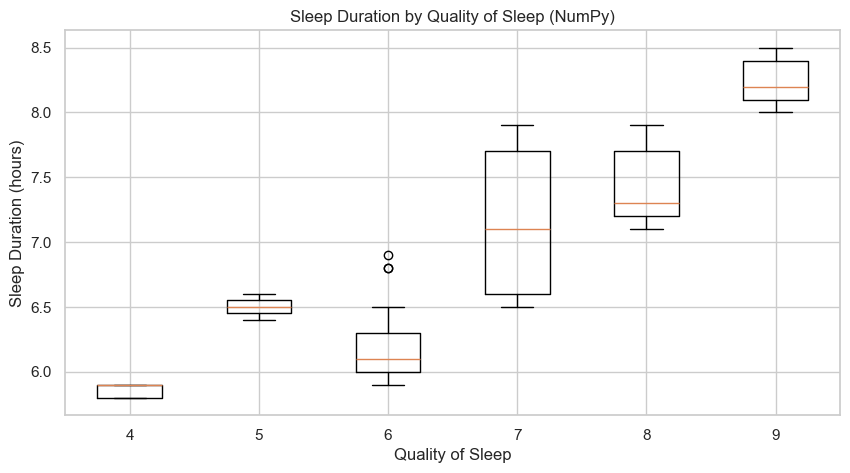

C:\Users\83961\AppData\Local\Temp\ipykernel_6384\3984589086.py:188: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stress_sleep_duration, labels=stress_unique)


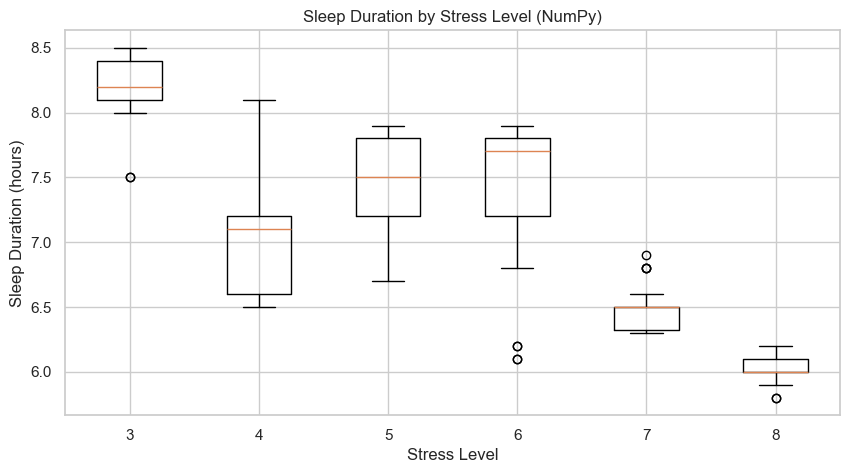

C:\Users\83961\AppData\Local\Temp\ipykernel_6384\3984589086.py:198: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(activity_sleep_duration, labels=activity_unique)


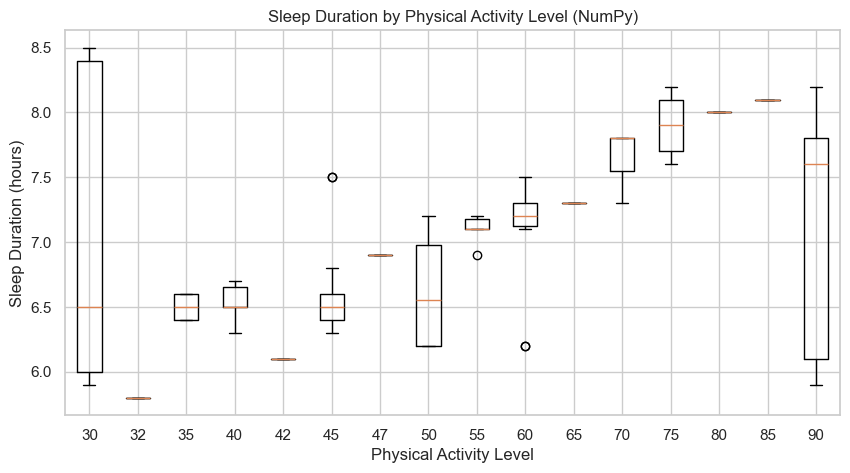

C:\Users\83961\AppData\Local\Temp\ipykernel_6384\3984589086.py:208: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(occupation_sleep_duration, labels=occupation_unique)


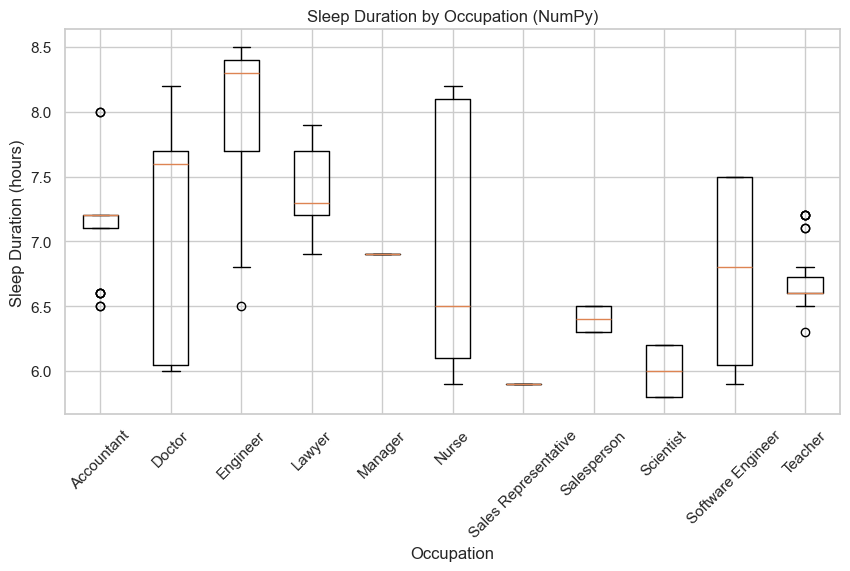

C:\Users\83961\AppData\Local\Temp\ipykernel_6384\3984589086.py:219: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bmi_sleep_duration, labels=bmi_unique)


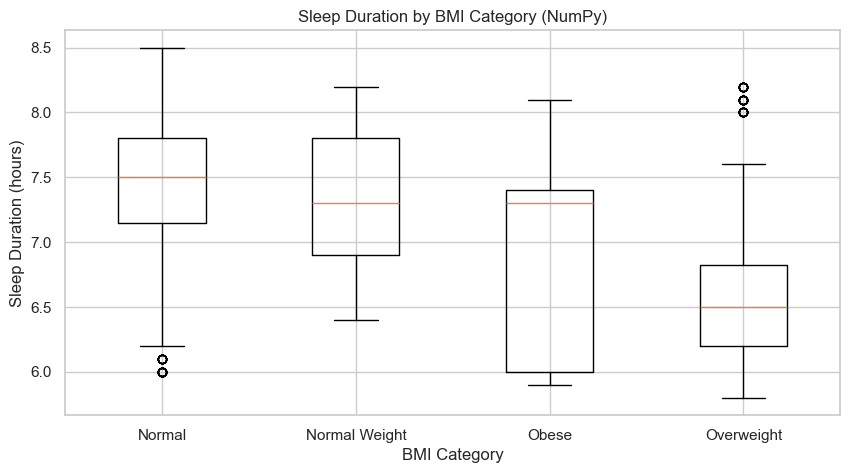

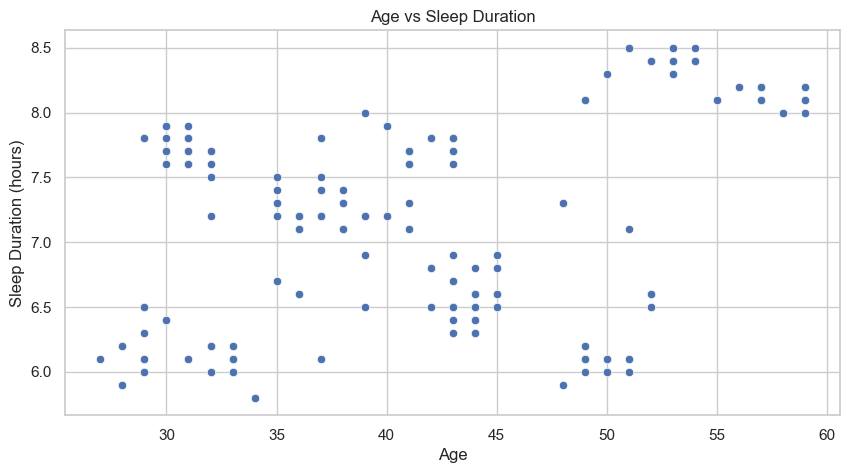

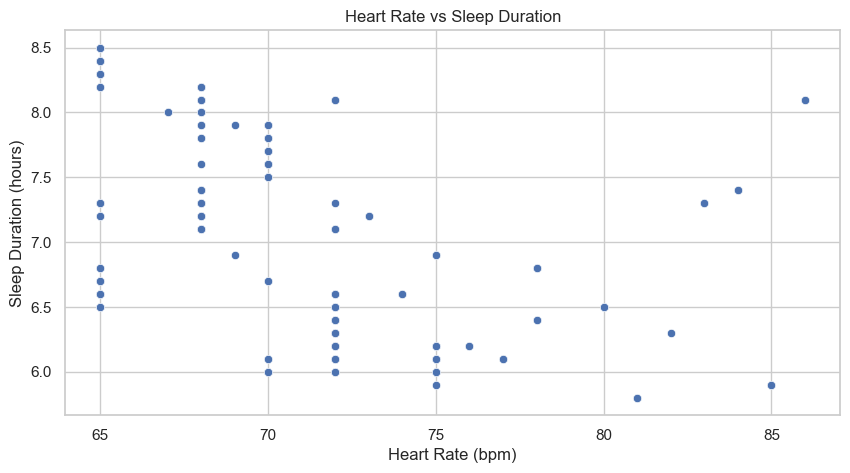

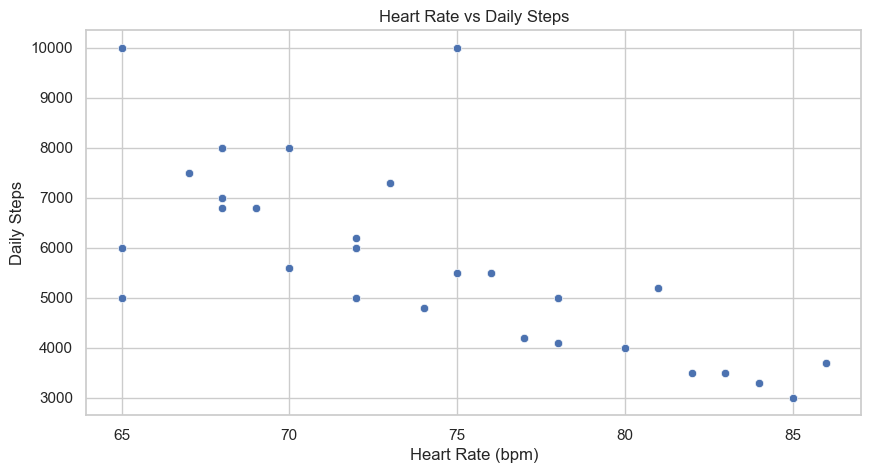

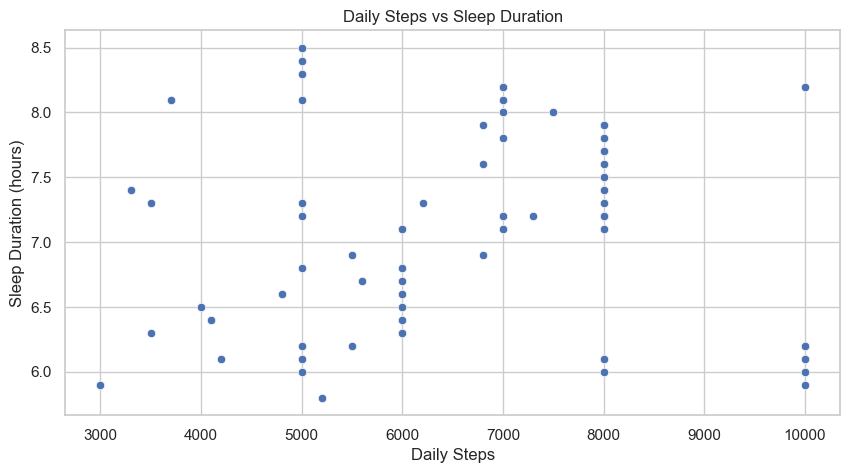

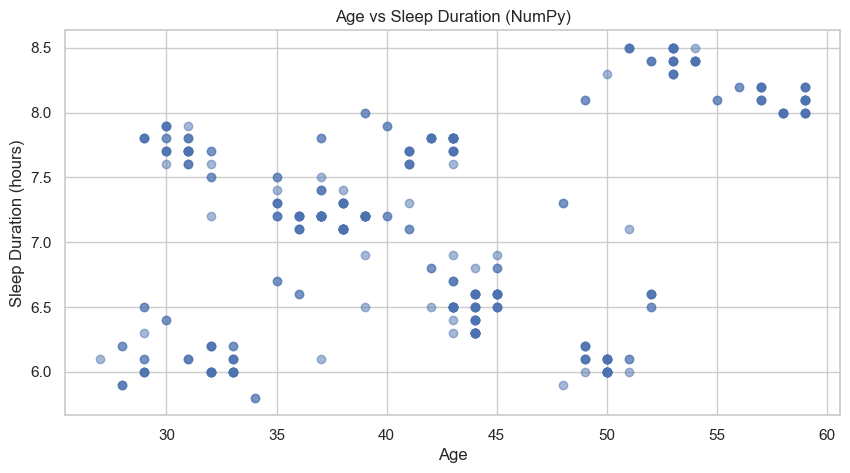

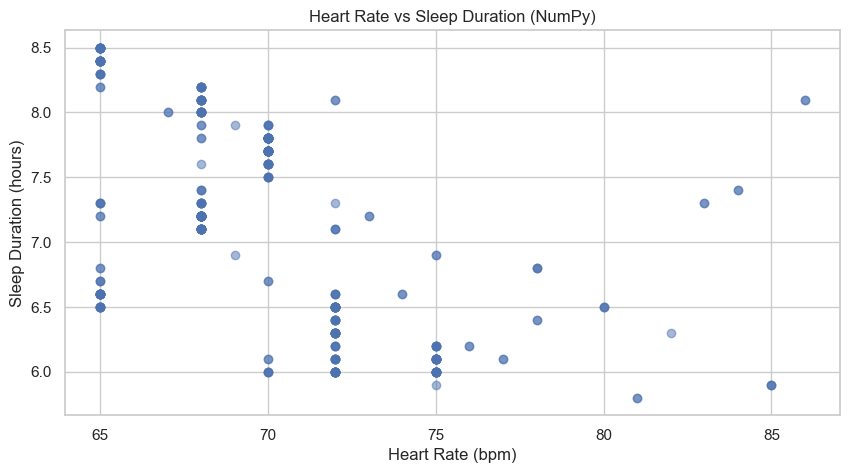

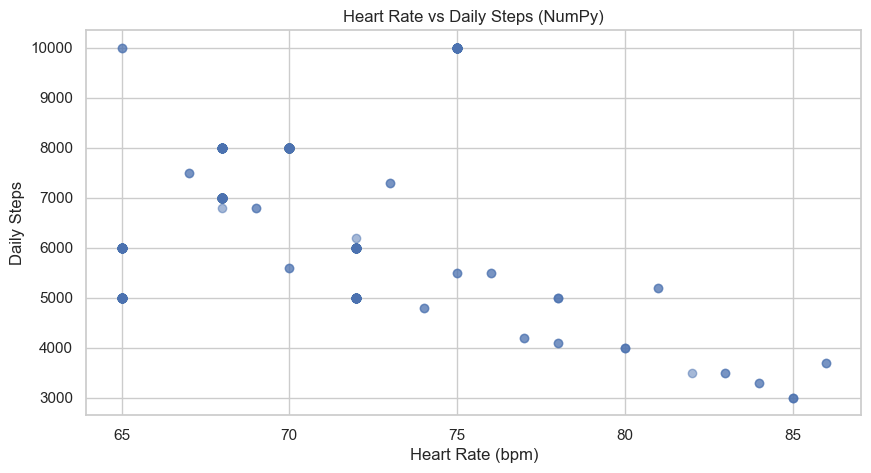

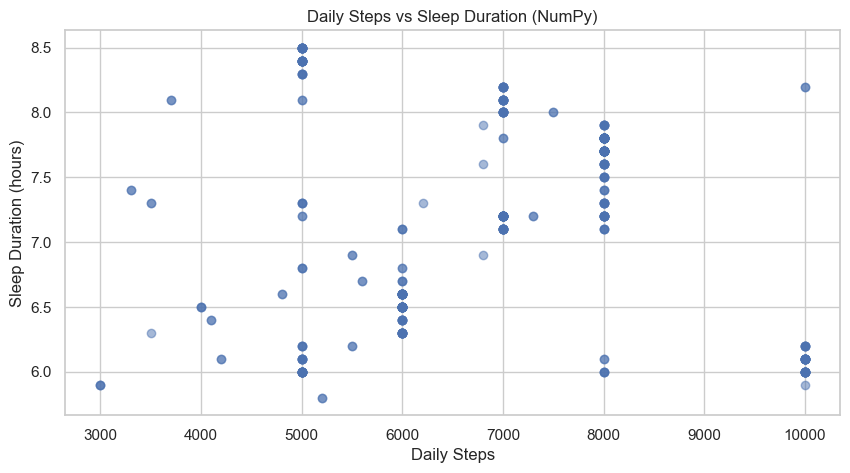

Time taken by pandas: 2.1295 seconds
Time taken by NumPy: 1.8194 seconds
NumPy is faster for this analysis.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the dataset using pandas
df = pd.read_csv('sleep_health.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Step 1: Using only pandas to plot distributions
start_time_pandas = time.time()

# 1.1 Plot Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Plot Sleep Duration distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Plot Quality of Sleep distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Quality of Sleep'], bins=10, kde=False)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 1.4 Plot Physical Activity Level distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Physical Activity Level'], bins=10, kde=False)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 1.5 Plot Stress Level distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Stress Level'], bins=10, kde=False)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 1.6 Plot Heart Rate distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Heart Rate'], bins=20, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# Capture the end time for pandas distributions
end_time_pandas = time.time()

# Step 2: Using only NumPy to plot distributions
start_time_numpy = time.time()

# For distributions, we use matplotlib directly with NumPy
# 1.1 Age distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, density=True, alpha=0.6, color='g')
plt.title('Age Distribution (NumPy)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 1.2 Sleep Duration distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Sleep Duration'], bins=20, density=True, alpha=0.6, color='g')
plt.title('Sleep Duration Distribution (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.show()

# 1.3 Quality of Sleep distribution
unique_quality, counts_quality = np.unique(df['Quality of Sleep'], return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_quality, counts_quality)
plt.title('Quality of Sleep Distribution (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

# 1.4 Physical Activity Level distribution
unique_activity, counts_activity = np.unique(df['Physical Activity Level'], return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_activity, counts_activity)
plt.title('Physical Activity Level Distribution (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

# 1.5 Stress Level distribution
unique_stress, counts_stress = np.unique(df['Stress Level'], return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_stress, counts_stress)
plt.title('Stress Level Distribution (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 1.6 Heart Rate distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Heart Rate'], bins=20, density=True, alpha=0.6, color='g')
plt.title('Heart Rate Distribution (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Density')
plt.show()

# Capture the end time for NumPy distributions
end_time_numpy = time.time()

# Step 3: Using only pandas for distribution based on categories
start_time_pandas_dist = time.time()

# 3.1 Sleep Duration based on Quality of Sleep
plt.figure(figsize=(10, 5))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
plt.figure(figsize=(10, 5))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
plt.figure(figsize=(10, 5))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 3.5 Sleep Duration based on BMI
plt.figure(figsize=(10, 5))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_pandas_dist = time.time()

# Step 4: Using only NumPy for distribution based on categories
start_time_numpy_dist = time.time()

# 3.1 Sleep Duration based on Quality of Sleep
quality_unique = np.unique(df['Quality of Sleep'])
quality_sleep_duration = [df['Sleep Duration'][df['Quality of Sleep'] == q] for q in quality_unique]
plt.figure(figsize=(10, 5))
plt.boxplot(quality_sleep_duration, labels=quality_unique)
plt.title('Sleep Duration by Quality of Sleep (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
stress_unique = np.unique(df['Stress Level'])
stress_sleep_duration = [df['Sleep Duration'][df['Stress Level'] == s] for s in stress_unique]
plt.figure(figsize=(10, 5))
plt.boxplot(stress_sleep_duration, labels=stress_unique)
plt.title('Sleep Duration by Stress Level (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
activity_unique = np.unique(df['Physical Activity Level'])
activity_sleep_duration = [df['Sleep Duration'][df['Physical Activity Level'] == a] for a in activity_unique]
plt.figure(figsize=(10, 5))
plt.boxplot(activity_sleep_duration, labels=activity_unique)
plt.title('Sleep Duration by Physical Activity Level (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
occupation_unique = np.unique(df['Occupation'])
occupation_sleep_duration = [df['Sleep Duration'][df['Occupation'] == o] for o in occupation_unique]
plt.figure(figsize=(10, 5))
plt.boxplot(occupation_sleep_duration, labels=occupation_unique)
plt.title('Sleep Duration by Occupation (NumPy)')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

# 3.5 Sleep Duration based on BMI
bmi_unique = np.unique(df['BMI Category'])
bmi_sleep_duration = [df['Sleep Duration'][df['BMI Category'] == b] for b in bmi_unique]
plt.figure(figsize=(10, 5))
plt.boxplot(bmi_sleep_duration, labels=bmi_unique)
plt.title('Sleep Duration by BMI Category (NumPy)')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_numpy_dist = time.time()

# Step 5: Using only pandas for relationships
start_time_pandas_relationships = time.time()

# 5.1 Age and Sleep Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Sleep Duration and Heart Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Heart Rate', y='Sleep Duration', data=df)
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.3 Heart Rate and Daily Steps
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4 Sleep Duration and Daily Steps
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df)
plt.title('Daily Steps vs Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_pandas_relationships = time.time()

# Step 6: Using only NumPy for relationships
start_time_numpy_relationships = time.time()

# 6.1 Age and Sleep Duration
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.5)
plt.title('Age vs Sleep Duration (NumPy)')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.2 Sleep Duration and Heart Rate
plt.figure(figsize=(10, 5))
plt.scatter(df['Heart Rate'], df['Sleep Duration'], alpha=0.5)
plt.title('Heart Rate vs Sleep Duration (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 6.3 Heart Rate and Daily Steps
plt.figure(figsize=(10, 5))
plt.scatter(df['Heart Rate'], df['Daily Steps'], alpha=0.5)
plt.title('Heart Rate vs Daily Steps (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 6.4 Sleep Duration and Daily Steps
plt.figure(figsize=(10, 5))
plt.scatter(df['Daily Steps'], df['Sleep Duration'], alpha=0.5)
plt.title('Daily Steps vs Sleep Duration (NumPy)')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_numpy_relationships = time.time()

# Step 7: Calculate time differences
pandas_time = (end_time_pandas - start_time_pandas) + (end_time_pandas_dist - start_time_pandas_dist) + (end_time_pandas_relationships - start_time_pandas_relationships)
numpy_time = (end_time_numpy - start_time_numpy) + (end_time_numpy_dist - start_time_numpy_dist) + (end_time_numpy_relationships - start_time_numpy_relationships)

print(f'Time taken by pandas: {pandas_time:.4f} seconds')
print(f'Time taken by NumPy: {numpy_time:.4f} seconds')

# Conclusion on performance
if pandas_time < numpy_time:
    print("Pandas is faster for this analysis.")
else:
    print("NumPy is faster for this analysis.")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

